<a href="https://colab.research.google.com/github/Kishan459/Cardiovascular-Rist-Prediction/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
metadata_df = pd.read_csv('/content/drive/MyDrive/Zomato Project/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato Project/Zomato Restaurant reviews.csv')

In [4]:
metadata_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [6]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [8]:
metadata_df.isnull().mean()*100

Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64

In [9]:
reviews_df.isnull().mean()*100

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

In [10]:
reviews_df[reviews_df['Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


#### Review column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done. It can also be seen that most of the null values in the review column also have nulls in other corresponding columns such as Reviewer, Rating, Metadata, and Time. These instances should be dropped.

In [11]:
reviews_df.dropna(inplace=True)

In [12]:
reviews_df.Rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [13]:
reviews_df.shape

(9955, 7)

In [14]:
reviews_df =  reviews_df[reviews_df['Rating']!= 'Like']
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')

#### there is only one observation of like so, we are removing it and coverting Rating into float data type

In [15]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [16]:
reviews_df['reviews'],reviews_df['followers'] = reviews_df['Metadata'].str.split(',').str

#### extracting two new fetures reviews and followers from Metadata column.

In [17]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,reviews,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1 Review,2 Followers
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3 Reviews,2 Followers
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2 Reviews,3 Followers
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1 Review,1 Follower
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3 Reviews,2 Followers


In [18]:
# extracting numeric portion and changing it into integer
reviews_df['reviews'] = pd.to_numeric(reviews_df['reviews'].str.split(' ').str[0])
reviews_df['followers'] = pd.to_numeric(reviews_df['followers'].str.split(' ').str[1])

In [19]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,reviews,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2.0


In [20]:
reviews_df.dtypes

Restaurant     object
Reviewer       object
Review         object
Rating        float64
Metadata       object
Time           object
Pictures        int64
reviews         int64
followers     float64
dtype: object

In [21]:
# converting time into datetime datatype and extracting two new features year and hour from it
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])
reviews_df['year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [22]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,reviews,followers,year,hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1,2.0,2019,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3,2.0,2019,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2,3.0,2019,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,1,1.0,2019,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,3,2.0,2019,21


In [23]:
# droping matadata
reviews_df = reviews_df.drop(['Metadata'],axis=1)

In [24]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,reviews,followers,year,hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,21


In [25]:
reviews_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

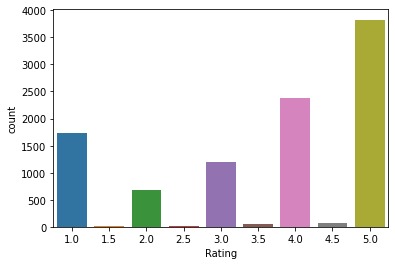

In [28]:
sns.countplot(reviews_df['Rating'])

In [44]:
rating_df = reviews_df.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False).reset_index()
rating_df

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.880
1,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
3,Paradise,4.700
4,Flechazo,4.660
...,...,...
95,Behrouz Biryani,2.825
96,Mathura Vilas,2.820
97,Pakwaan Grand,2.710
98,Asian Meal Box,2.580


Text(0.5, 1.0, 'Top ten Highest rated Restaurant')

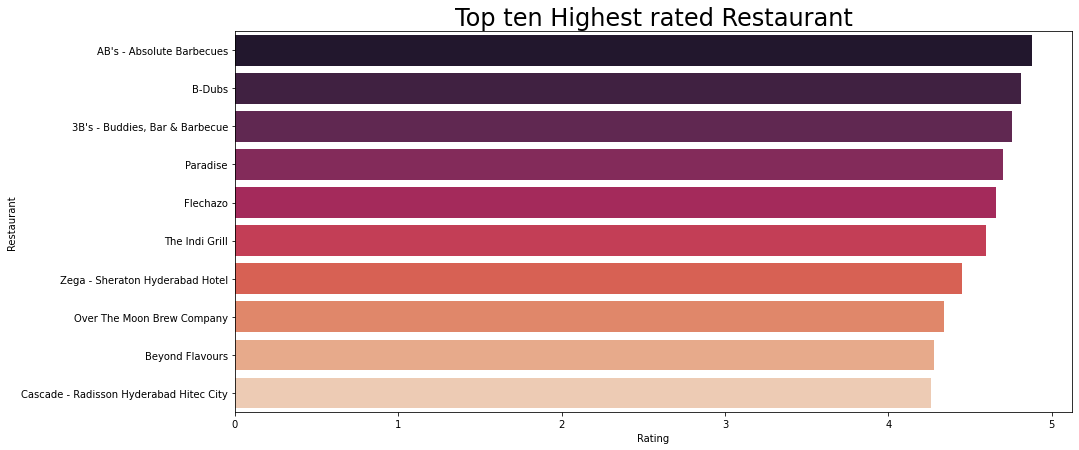

In [45]:
plt.figure(figsize=(15,7))
sns.barplot(data= rating_df.head(10), x='Rating', y = "Restaurant",palette='rocket')
plt.title('Top ten Highest rated Restaurant', fontsize=24)

In [50]:
year_av_rating = reviews_df.groupby(['Restaurant','year'])['Rating'].mean().sort_values(ascending=False).reset_index()
year_av_rating

,Restaurant,year,Rating
0,AB's - Absolute Barbecues,2019,4.880000
1,B-Dubs,2019,4.810000
2,"3B's - Buddies, Bar & Barbecue",2019,4.760000
3,Paradise,2019,4.700000
4,Flechazo,2019,4.660000
...,...,...,...
182,Hotel Zara Hi-Fi,2019,1.931818
183,Hitech Bawarchi Food Zone,2019,1.842105
184,Shree Santosh Dhaba Family Restaurant,2019,1.750000
185,Mohammedia Shawarma,2019,1.733333


In [54]:
reviews_df.year.unique()

array([2019, 2018, 2017, 2016])

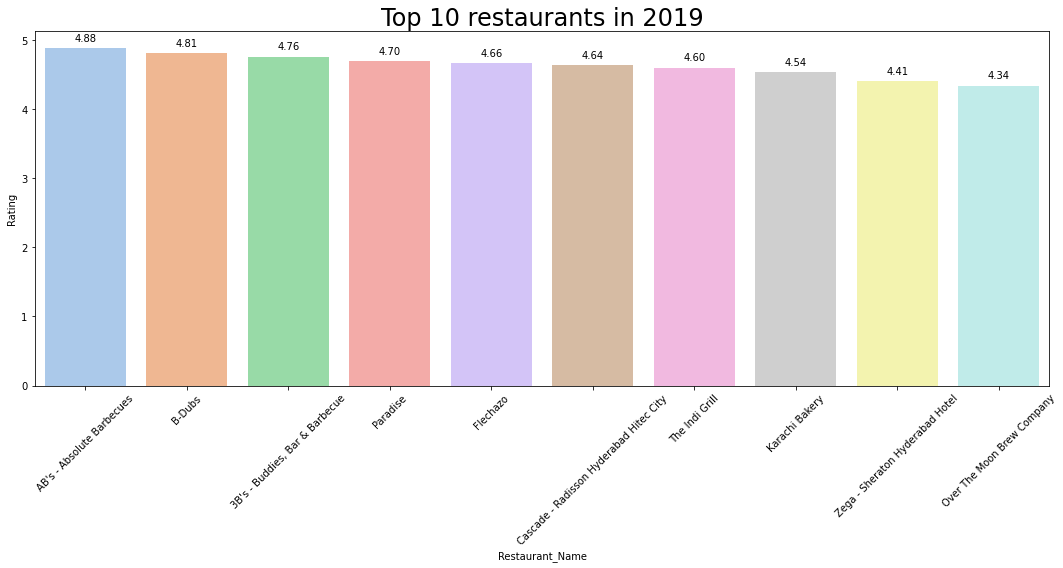

In [53]:
year_2019_top_10 = year_av_rating[year_av_rating.year == 2019].head(10)

plt.figure(figsize=(15, 8))
plot = sns.barplot(year_2019_top_10.Restaurant, year_2019_top_10.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2019',fontsize=24)
plt.tight_layout()

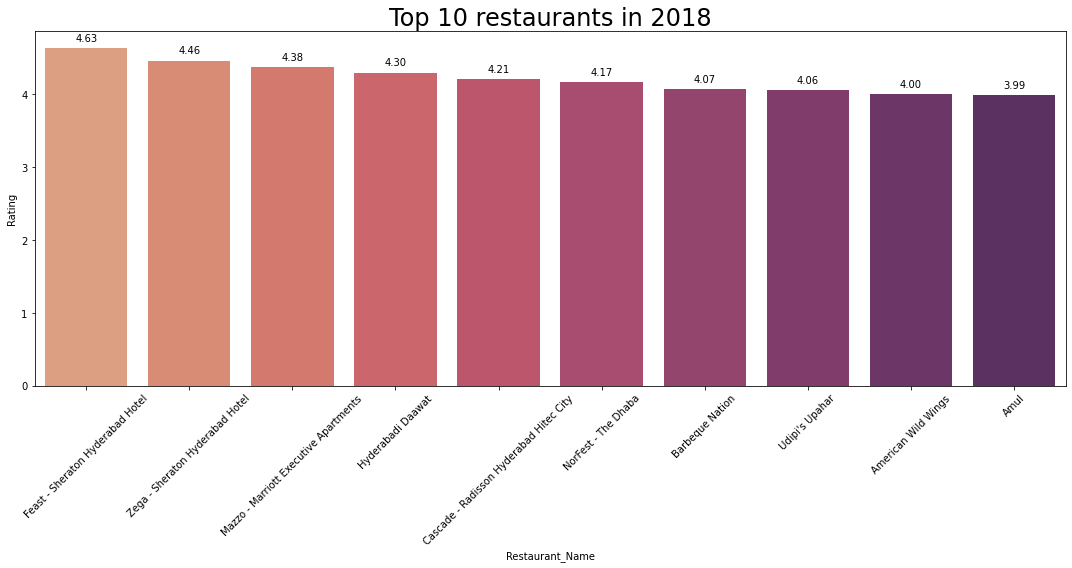

In [59]:
year_2018_top_10 = year_av_rating[year_av_rating.year == 2018].head(10)

plt.figure(figsize=(15, 8))
plot = sns.barplot(year_2018_top_10.Restaurant, year_2018_top_10.Rating, palette='flare')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2018',fontsize=24)
plt.tight_layout()

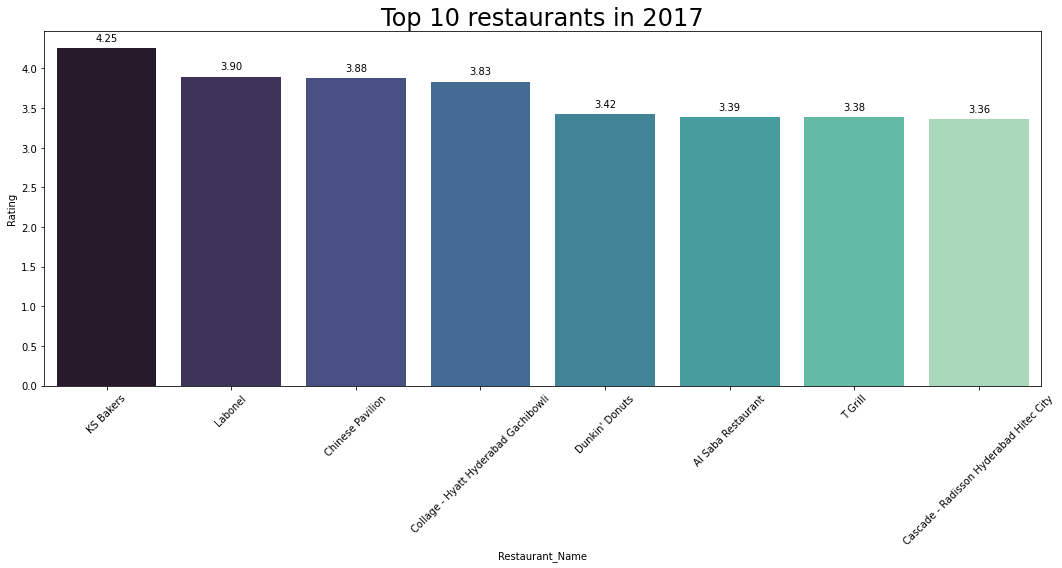

In [58]:
year_2017_top_10 = year_av_rating[year_av_rating.year == 2017].head(10)

plt.figure(figsize=(15, 8))
plot = sns.barplot(year_2017_top_10.Restaurant, year_2017_top_10.Rating, palette='mako')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2017',fontsize=24)
plt.tight_layout()

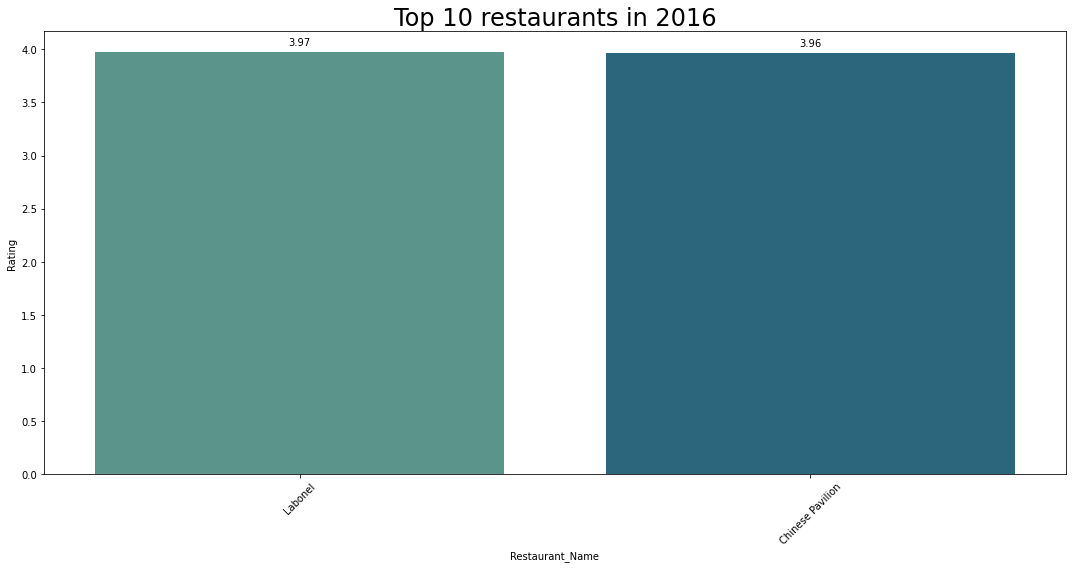

In [61]:
year_2016_top_10 = year_av_rating[year_av_rating.year == 2016].head(10)

plt.figure(figsize=(15, 8))
plot = sns.barplot(year_2016_top_10.Restaurant, year_2016_top_10.Rating, palette='crest')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2016',fontsize=24)
plt.tight_layout()